In [862]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import math
import json
import re

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import tensorflow_addons as tfa
from keras.models import Sequential, Input, Model
from keras_self_attention import SeqSelfAttention
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import concatenate
from keras.layers import Bidirectional

from keras.layers.recurrent import LSTM,GRU
from keras.models import load_model
import keras
from tcn import TCN, tcn_full_summary
from keras_multi_head import MultiHead
from keras_multi_head import MultiHeadAttention
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.client import device_lib
from keras import backend as K
import tensorflow as tf
np.set_printoptions(threshold=np.inf)

import tensorflow_hub as hub
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
#from keras.preprocessing.sequence import pad_sequences

from spektral.layers import GCNConv
from spektral.models.gcn import GCN
#from transformers import BertTokenizer, TFBertModel, BertConfig
#nltk.download('stopwords')
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')
#embed = TFBertModel.from_pretrained("bert-base-uncased")
#stop_words = set(stopwords.words('english'))

2021-07-10 20:30:44,807 loading file /home/gjiaying/.flair/models/sentiment-en-mix-distillbert_4.pt


In [863]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16301509056843056275
]


In [492]:
X = pd.read_csv(os.getcwd()+'/price/alltrainings.csv')
X_test = pd.read_csv(os.getcwd()+'/price/alltestings.csv')
X_val = pd.read_csv(os.getcwd()+'/price/allvalidations.csv')
#X = X.drop(X.columns[0], axis=1)
#X_test = X_test.drop(X_test.columns[0], axis=1)
#X_val = X_val.drop(X_val.columns[0], axis=1)
y = X['label']
y_test = X_test['label']
y_val = X_val['label']
#baseline1
#X = X[['date','adj close','high','low','label']]
#X_val = X_val[['date','adj close','high','low','label']]
#X_test = X_test[['date','adj close','high','low','label']]

#baseline3 L1 regularization
#X = X[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx_pos','trend_mass_index','trend_cci','trend_aroon_up','trend_aroon_down','trend_aroon_ind','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','stoch_signal','TSI','WilliamsR','adx_neg','aroon_down','aroon','aroon_up','MI','CR','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx_pos','trend_mass_index','trend_cci','trend_aroon_up','trend_aroon_down','trend_aroon_ind','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','stoch_signal','TSI','WilliamsR','adx_neg','aroon_down','aroon','aroon_up','MI','CR','label']]

#X = X[['date','adj close','high','low','open','close','volume','volume_nvi', 'volatility_atr', 'volatility_bbw', 'volatility_dchi', 'trend_macd', 'trend_macd_signal', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst_diff', 'trend_aroon_up', 'momentum_rsi', 'momentum_mfi', 'momentum_uo', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_roc', 'others_dlr', 'others_cr', 'AO', 'MFI', 'ROC', 'RSI', 'stoch_signal', 'UO', 'WilliamsR', 'NVI', 'ATR', 'bb_bbw', 'dc_dchi', 'adx', 'adx_neg', 'aroon_up', 'CCI', 'DPO', 'KST', 'KST_diff', 'macd', 'macd_sig', 'MI', 'CR', 'DLR','label']]
#X_val = X_val[['date','adj close','high','low','open','close','volume','volume_nvi', 'volatility_atr', 'volatility_bbw', 'volatility_dchi', 'trend_macd', 'trend_macd_signal', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst_diff', 'trend_aroon_up', 'momentum_rsi', 'momentum_mfi', 'momentum_uo', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_roc', 'others_dlr', 'others_cr', 'AO', 'MFI', 'ROC', 'RSI', 'stoch_signal', 'UO', 'WilliamsR', 'NVI', 'ATR', 'bb_bbw', 'dc_dchi', 'adx', 'adx_neg', 'aroon_up', 'CCI', 'DPO', 'KST', 'KST_diff', 'macd', 'macd_sig', 'MI', 'CR', 'DLR','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume','volume_nvi', 'volatility_atr', 'volatility_bbw', 'volatility_dchi', 'trend_macd', 'trend_macd_signal', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst_diff', 'trend_aroon_up', 'momentum_rsi', 'momentum_mfi', 'momentum_uo', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_roc', 'others_dlr', 'others_cr', 'AO', 'MFI', 'ROC', 'RSI', 'stoch_signal', 'UO', 'WilliamsR', 'NVI', 'ATR', 'bb_bbw', 'dc_dchi', 'adx', 'adx_neg', 'aroon_up', 'CCI', 'DPO', 'KST', 'KST_diff', 'macd', 'macd_sig', 'MI', 'CR', 'DLR','label']]


#baseline3 L1+MBR
X = X[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx_pos','trend_mass_index','trend_cci','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','stoch_signal','TSI','WilliamsR','adx_neg','MI','CR','label']]
X_test = X_test[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx_pos','trend_mass_index','trend_cci','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','stoch_signal','TSI','WilliamsR','adx_neg','MI','CR','label']]
X_val = X_val[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx_pos','trend_mass_index','trend_cci','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','stoch_signal','TSI','WilliamsR','adx_neg','MI','CR','label']]

#X = X[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx','trend_adx_pos','trend_adx_neg','trend_mass_index','trend_cci','trend_dpo','trend_kst_diff','momentum_mfi','momentum_uo','momentum_wr','momentum_roc','others_dlr','others_cr','MFI','stoch_signal','UO','WilliamsR','NVI','adx','adx_neg','DPO','KST','KST_diff','MI','CR','DLR','label']]
#X_val = X_val[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx','trend_adx_pos','trend_adx_neg','trend_mass_index','trend_cci','trend_dpo','trend_kst_diff','momentum_mfi','momentum_uo','momentum_wr','momentum_roc','others_dlr','others_cr','MFI','stoch_signal','UO','WilliamsR','NVI','adx','adx_neg','DPO','KST','KST_diff','MI','CR','DLR','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume','volume_nvi','trend_adx','trend_adx_pos','trend_adx_neg','trend_mass_index','trend_cci','trend_dpo','trend_kst_diff','momentum_mfi','momentum_uo','momentum_wr','momentum_roc','others_dlr','others_cr','MFI','stoch_signal','UO','WilliamsR','NVI','adx','adx_neg','DPO','KST','KST_diff','MI','CR','DLR','label']]

#baseline3 L1+MBR+RFE
#X = X[['date','adj close','high','low','open','close','volume','trend_adx_pos','trend_mass_index','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','TSI','WilliamsR','MI','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume','trend_adx_pos','trend_mass_index','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','TSI','WilliamsR','MI','label']]
#X_val = X_val[['date','adj close','high','low','open','close','volume','trend_adx_pos','trend_mass_index','momentum_rsi','momentum_stoch','momentum_wr','RSI','Stoch','TSI','WilliamsR','MI','label']]
#X = X[['date','adj close','high','low','open','close','volume', 'volume_nvi', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst_diff', 'momentum_mfi', 'momentum_uo', 'momentum_wr', 'momentum_roc', 'others_dlr', 'others_cr', 'MFI', 'stoch_signal', 'UO', 'WilliamsR', 'NVI', 'adx', 'adx_neg', 'KST', 'KST_diff', 'MI', 'CR', 'DLR','label']]
#X_val = X_val[['date','adj close','high','low','open','close','volume', 'volume_nvi', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst_diff', 'momentum_mfi', 'momentum_uo', 'momentum_wr', 'momentum_roc', 'others_dlr', 'others_cr', 'MFI', 'stoch_signal', 'UO', 'WilliamsR', 'NVI', 'adx', 'adx_neg', 'KST', 'KST_diff', 'MI', 'CR', 'DLR','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume', 'volume_nvi', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst_diff', 'momentum_mfi', 'momentum_uo', 'momentum_wr', 'momentum_roc', 'others_dlr', 'others_cr', 'MFI', 'stoch_signal', 'UO', 'WilliamsR', 'NVI', 'adx', 'adx_neg', 'KST', 'KST_diff', 'MI', 'CR', 'DLR','label']]

#baseline3 MBR
#X = X[['date','adj close','high','low','open','close','volume','MI','trend_mass_index','CMF','volume_cmf','trend_dpo','DPO','trend_vortex_ind_neg','momentum_uo','momentum_mfi','adx_pos','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume','MI','trend_mass_index','CMF','volume_cmf','trend_dpo','DPO','trend_vortex_ind_neg','momentum_uo','momentum_mfi','adx_pos','label']]
#X = X[['date','adj close','high','low','open','close','volume','volume_adi','volume_obv','volume_cmf','volume_fi','volume_em','volume_vpt','volume_nvi','volatility_atr','trend_adx','trend_adx_pos','trend_adx_neg','trend_vortex_ind_pos','trend_vortex_ind_neg','trend_vortex_ind_diff','trend_mass_index','trend_cci','trend_dpo','trend_kst_diff','momentum_rsi','momentum_mfi','momentum_uo','momentum_stoch_signal','momentum_roc','others_cr','MFI','ROC','RSI','stoch_signal','UO','ADI','CMF','EoM','FI','NVI','OBV','VPT','adx','adx_neg','adx_pos','CCI','DPO','KST_diff','MI','vi_diff','vi_neg','vi_pos','CR','label']]
#X_val = X_val[['date','adj close','high','low','open','close','volume','volume_adi','volume_obv','volume_cmf','volume_fi','volume_em','volume_vpt','volume_nvi','volatility_atr','trend_adx','trend_adx_pos','trend_adx_neg','trend_vortex_ind_pos','trend_vortex_ind_neg','trend_vortex_ind_diff','trend_mass_index','trend_cci','trend_dpo','trend_kst_diff','momentum_rsi','momentum_mfi','momentum_uo','momentum_stoch_signal','momentum_roc','others_cr','MFI','ROC','RSI','stoch_signal','UO','ADI','CMF','EoM','FI','NVI','OBV','VPT','adx','adx_neg','adx_pos','CCI','DPO','KST_diff','MI','vi_diff','vi_neg','vi_pos','CR','label']]
#X_test = X_test[['date','adj close','high','low','open','close','volume','volume_adi','volume_obv','volume_cmf','volume_fi','volume_em','volume_vpt','volume_nvi','volatility_atr','trend_adx','trend_adx_pos','trend_adx_neg','trend_vortex_ind_pos','trend_vortex_ind_neg','trend_vortex_ind_diff','trend_mass_index','trend_cci','trend_dpo','trend_kst_diff','momentum_rsi','momentum_mfi','momentum_uo','momentum_stoch_signal','momentum_roc','others_cr','MFI','ROC','RSI','stoch_signal','UO','ADI','CMF','EoM','FI','NVI','OBV','VPT','adx','adx_neg','adx_pos','CCI','DPO','KST_diff','MI','vi_diff','vi_neg','vi_pos','CR','label']]

#baseline2
#X = X.drop(['Daily Percentage Change', 'Daily Change', 'prev adj close', 'y_t','label'], axis = 1)
#X_val = X_val.drop(['Daily Percentage Change', 'Daily Change', 'prev adj close', 'y_t'], axis = 1)
#X_test = X_test.drop(['Daily Percentage Change', 'Daily Change', 'prev adj close', 'y_t'], axis = 1)
X = X.set_index('date')
X_test = X_test.set_index('date')
X_val = X_val.set_index('date')

In [493]:
normalized_X = X
mean = X.mean(axis = 0)
normalized_X -= mean
std = normalized_X.std(axis=0)
normalized_X /= std

normalized_X_test = X_test.astype(float)
mean = X_test.mean(axis = 0)
normalized_X_test -= mean
std = normalized_X_test.std(axis=0)
normalized_X_test /= std

normalized_X_val = X_val.astype(float)
mean = X_val.mean(axis = 0)
normalized_X_val -= mean
std = normalized_X_val.std(axis=0)
normalized_X_val /= std

normalized_X = normalized_X.drop('label', axis = 1)
norm_X = normalized_X.copy()

normalized_X_test = normalized_X_test.drop('label', axis = 1)
norm_X_test = normalized_X_test.copy()

normalized_X_val = normalized_X_val.drop('label', axis = 1)
norm_X_val = normalized_X_val.copy()


normalized_X = normalized_X.values
normalized_X_test = normalized_X_test.values
normalized_X_val = normalized_X_val.values
norm_X = norm_X.values
norm_X_test = norm_X_test.values
norm_X_val = norm_X_val.values
norm_X = np.expand_dims(norm_X, axis = 1)
print(norm_X.shape)
print(y.shape)

(15227, 1, 21)
(15227,)


In [494]:
windows = 5
lstm_input=[]
for i in range(len(norm_X)-windows):
  lstm_input.append(norm_X[i:i+windows,:])
lstm_input=np.array(lstm_input)
y = y[windows:]
lstm_input = np.squeeze(lstm_input,axis=2)
print(lstm_input.shape)
print(y.shape)

(15222, 5, 21)
(15222,)


In [495]:
norm_X_test = np.expand_dims(norm_X_test, axis = 1)
norm_X_test_input=[]
for i in range(len(norm_X_test)-windows):
  norm_X_test_input.append(norm_X_test[i:i+windows,:])
norm_X_test_input=np.array(norm_X_test_input)
print(norm_X_test_input.shape)
norm_X_test_input = np.squeeze(norm_X_test_input,axis=2)
print(norm_X_test_input.shape)
y_test = y_test[windows:]

(2513, 5, 1, 21)
(2513, 5, 21)


In [496]:
norm_X_val = np.expand_dims(norm_X_val, axis = 1)
print(norm_X_val.shape)
norm_X_val_input=[]
for i in range(len(norm_X_val)-windows):
  norm_X_val_input.append(norm_X_val[i:i+windows,:])
norm_X_val_input=np.array(norm_X_val_input)
print(norm_X_val_input.shape)
norm_X_val_input = np.squeeze(norm_X_val_input,axis=2)
print(norm_X_val_input.shape)
y_val = y_val[windows:]

(1659, 1, 21)
(1654, 5, 1, 21)
(1654, 5, 21)


In [497]:
MAX_LENGTH = 50
EMBEDDING_DIMENSION = 512
WINDOWS = 5
BATCH_SIZE = 32

In [498]:
def preprocessing(company, date):
    str = company + '/' + date
    filepath = os.getcwd() + '/tweet/preprocessed/' + str
    list = []
    with open(filepath, 'r') as file:
        for line in file:
            data = json.loads(line)
            list.append(data['text'])
    return list

In [499]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = tweet.replace("#", "").replace("_", "").replace("$", "") #Remove hashtag sign but keep the text
    tweet = tweet.replace("rt", "").replace("AT _ USER", "").replace("URL", "")
    words = tweet.split()
    wordsnew = tweet.split()
    for i in range(len(words)):       
        if '$' == words[i]:
         
            wordsnew = wordsnew[:i+1] + wordsnew[i + 2:]
    
    tweet = TreebankWordDetokenizer().detokenize(wordsnew)
    tweet = tweet.replace("-","").replace("$","")
    return tweet

In [697]:
def get_data(path):
    filepath_com = os.getcwd() + '/price/test_sample/'
    company = os.listdir(filepath_com)

    total_list = []
    for i in range(len(company[:-1])):   #len(company[:-1])
        filepath_date = os.getcwd() + '/tweet/preprocessed/' + str(company[i][:-4])
        X = pd.read_csv(os.getcwd()+'/price/' + path + str(company[i]))
        date = os.listdir(filepath_date)
        
        for j in range(len(date)): #len(date)-1
            if date[j] in X['date'].values.tolist() and date[j][:-4] is not '.ipynb_checkpo':
                #print(date[j])
                list_oneday = []
                list_oneday_score = []
                list = preprocessing(company[i][:-4], date[j])
                for k in range(len(list)):
                    sentence = Sentence(TreebankWordDetokenizer().detokenize(list[k]))
                    #print(sentence)
                    #print(cleaner(str(sentence)))
                    classifier.predict(sentence)
                    
                    list_oneday_score.append(sentence.labels[0].score)
                    oneday = (embed(list[k]))
                    
                    if oneday.shape[0] >= MAX_LENGTH:
                        list_oneday.append(oneday[0:MAX_LENGTH])
                    else:
                        one_as_vector = tf.reshape(oneday,[-1])
                        zero_paddings = tf.zeros([MAX_LENGTH*EMBEDDING_DIMENSION]-tf.shape(one_as_vector),dtype=oneday.dtype)
                        oneday_padded = tf.concat([one_as_vector, zero_paddings], 0)
                        results = tf.reshape(oneday_padded, [MAX_LENGTH, EMBEDDING_DIMENSION])
   
           
            
                        list_oneday.append(results)
                
                list_oneday_score = np.array(list_oneday_score)
                list_oneday_score = list_oneday_score/sum(list_oneday_score)
                res = list_oneday * list_oneday_score[:, np.newaxis, np.newaxis]
                #list_oneday = list_oneday*list_oneday_score
                list_oneday = tf.convert_to_tensor(res)
                #print(list_oneday)
                
               
                list_oneday = np.mean(list_oneday,axis=0)
                list_oneday = tf.convert_to_tensor(list_oneday)
                
                total_list.append(list_oneday)
        #print(len(total_list))
    total_list = tf.convert_to_tensor(total_list)
    #gru = tf.keras.layers.GRU(64)
    #total_list = (gru(total_list))
    print(total_list.shape)
    #np.save('embeddings.npy', embed(list[0]))
    #all_embeddings = np.load('embeddings.npy')
    #print(torch.FloatTensor(np.asarray(all_embeddings)))
    return total_list

In [698]:
training_datat = get_data('train_sample/')
validation_datat = get_data('val_sample/')
testing_datat = get_data('test_sample/')

(15227, 50, 512)
(1659, 50, 512)
(2518, 50, 512)


In [699]:
xtrain_inputt=[]
for i in range(len(training_datat)-WINDOWS):
  xtrain_inputt.append(training_datat[i:i+WINDOWS,:])
xtrain_inputt=np.array(xtrain_inputt)
print(xtrain_inputt.shape)
xtrain_inputt = xtrain_inputt.reshape(15222, WINDOWS, -1)

xval_inputt=[]
for i in range(len(validation_datat)-WINDOWS):
  xval_inputt.append(validation_datat[i:i+WINDOWS,:])
xval_inputt=np.array(xval_inputt)
print(xval_inputt.shape)
xval_inputt = xval_inputt.reshape(1654, WINDOWS, -1)

xtest_inputt=[]
for i in range(len(testing_datat)-WINDOWS):
  xtest_inputt.append(testing_datat[i:i+WINDOWS,:])
xtest_inputt=np.array(xtest_inputt)
print(xtest_inputt.shape)
xtest_inputt = xtest_inputt.reshape(2513, WINDOWS, -1)

(15222, 5, 50, 512)
(1654, 5, 50, 512)
(2513, 5, 50, 512)


In [701]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
    #return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mcc_m(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())

In [798]:
def custom_loss(y_true, y_pred):
 
   # bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False)
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0.1)
    bce_loss = bce(y_true, y_pred)
    mse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    loss = 0.85*bce_loss + 0.15*mse_loss
    
    return bce_loss

In [843]:
def create_model(input_shape, input_shapet):
    inputs = Input(shape=input_shape)
    inputst = Input(shape=input_shapet)
    x = TCN(nb_filters=16, return_sequences=True)(inputs)
    x = LSTM(64, input_shape=(WINDOWS,21), return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    for i in range(3):
        x1 = TCN(nb_filters=16, return_sequences=True)(inputs)
        x1 = LSTM(64, input_shape=(WINDOWS,21), return_sequences=True)(x1)
        x1 = Dropout(0.3)(x1)
        x1 = LSTM(32, return_sequences=True)(x1)
        x1 = Dropout(0.3)(x1)
        x1 = LSTM(16, return_sequences=True)(x1)
        x1 = Dropout(0.3)(x1)
        x = concatenate([x,x1],axis=-1)
    
    x = SeqSelfAttention(attention_activation='tanh')(x)
    x = LSTM(16, return_sequences=False)(x)
    x = Dropout(0.3)(x)
    x = Dense(16,kernel_initializer="uniform",activation='relu')(x)
    
    xt = TCN(nb_filters=16, return_sequences=True)(inputst)
    xt = Bidirectional(GRU(16, return_sequences=True))(xt)
    xt = Dropout(0.3)(xt)
    xt = Dense(16,kernel_initializer="uniform",activation='relu')(xt)
    
    
    for i in range(2):
        x2 = TCN(nb_filters=16, return_sequences=True)(inputst)
        x2 = Bidirectional(GRU(16, return_sequences=True))(x2)
        x2 = Dropout(0.3)(x2)
        
      #  x2 = Dense(16,kernel_initializer="uniform",activation='relu')(inputst)
        xt = concatenate([xt,x2],axis=-1)
        #x2 = Dense(16,kernel_initializer="uniform",activation='relu')(xt)
    
    xt = Bidirectional(GRU(16, return_sequences=False))(xt)
    xt = Dropout(0.3)(xt)
    xt = Dense(8,kernel_initializer="uniform",activation='relu')(xt)
    x_all = concatenate([x, xt],axis=-1)
  #  x_all = Dense(16,kernel_initializer="uniform",activation='relu')(x_all)
    x_final = Dense(1,kernel_initializer="uniform",activation='relu')(x_all)
    
    model = Model(inputs=[inputs,inputst], outputs = x_final)

    return model

In [856]:
model = create_model(input_shape=lstm_input.shape[1:], input_shapet=xtrain_inputt.shape[1:])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), metrics=['accuracy', f1_m, mcc_m])

In [857]:
my_callbacks = [
    # keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='modellstm.{epoch:02d}.h5'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

history=model.fit(
    [lstm_input,xtrain_inputt],
    y,
    batch_size=32,
    epochs=100,
    validation_data=([norm_X_val_input,xval_inputt], y_val),
    verbose=1,
    callbacks=my_callbacks)

Epoch 1/100
476/476 [==============================] - 160s 257ms/step - loss: 1.3409 - accuracy: 0.4917 - f1_m: 0.2701 - mcc_m: 0.0031 - val_loss: 0.6916 - val_accuracy: 0.5308 - val_f1_m: 0.2909 - val_mcc_m: 0.0149
Epoch 2/100
476/476 [==============================] - 32s 68ms/step - loss: 0.6977 - accuracy: 0.5052 - f1_m: 0.5461 - mcc_m: 0.0050 - val_loss: 0.6897 - val_accuracy: 0.5296 - val_f1_m: 0.3185 - val_mcc_m: 0.0199
Epoch 3/100
476/476 [==============================] - 32s 68ms/step - loss: 0.6964 - accuracy: 0.5035 - f1_m: 0.5194 - mcc_m: 0.0037 - val_loss: 0.6915 - val_accuracy: 0.5302 - val_f1_m: 0.3882 - val_mcc_m: 0.0385
Epoch 4/100
476/476 [==============================] - 32s 68ms/step - loss: 0.6884 - accuracy: 0.5436 - f1_m: 0.5565 - mcc_m: 0.0940 - val_loss: 0.7232 - val_accuracy: 0.4692 - val_f1_m: 0.5758 - val_mcc_m: -0.0052
Epoch 5/100
476/476 [==============================] - 32s 68ms/step - loss: 0.6634 - accuracy: 0.5984 - f1_m: 0.6062 - mcc_m: 0.2028 - v

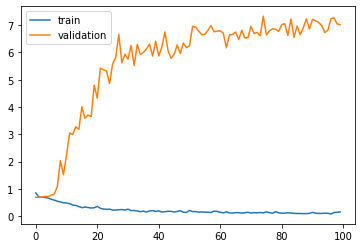

In [858]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

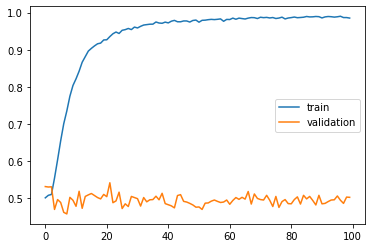

In [859]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [860]:
test_acc = model.evaluate([norm_X_test_input,xtest_inputt], y_test, batch_size = 32)
#y_pred = model.predict_classes(norm_X_test_input,batch_size = 32)

79/79 [==============================] - 1s 15ms/step - loss: 6.8890 - accuracy: 0.4974 - f1_m: 0.5055 - mcc_m: -0.0087


In [861]:
#@tf.autograph.experimental.do_not_convert
acc_hist = []
n = 1
for i in range(100):
  k = str(n).zfill(2)
  n += 1
  name = 'modellstm.' + k +'.h5'
  model11 = load_model(name, custom_objects={'SeqSelfAttention':SeqSelfAttention.get_custom_objects()['SeqSelfAttention'],'TCN':TCN,'f1_m':f1_m,'mcc_m':mcc_m,'custom_loss':custom_loss,'optim':optim})
  model11.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy', f1_m, mcc_m])
  loss,acc,f1,mcc = model11.evaluate([norm_X_test_input,xtest_inputt],y_test,batch_size=32)
  acc_hist.append(acc)
  print(acc)
 
    
print(max(acc_hist))
print(acc_hist.index(max(acc_hist))+1)

79/79 [==============================] - 16s 15ms/step - loss: 0.6925 - accuracy: 0.5201 - f1_m: 0.2995 - mcc_m: 0.0540
0.49860724806785583
79/79 [==============================] - 22s 16ms/step - loss: 0.6930 - accuracy: 0.5240 - f1_m: 0.3179 - mcc_m: 0.0512
0.5029844641685486
79/79 [==============================] - 14s 15ms/step - loss: 0.6924 - accuracy: 0.5233 - f1_m: 0.3569 - mcc_m: 0.0412
0.5057699680328369
79/79 [==============================] - 15s 15ms/step - loss: 0.7034 - accuracy: 0.4949 - f1_m: 0.6081 - mcc_m: -0.0134
0.5045762062072754
79/79 [==============================] - 25s 16ms/step - loss: 0.7101 - accuracy: 0.4877 - f1_m: 0.5231 - mcc_m: -0.0210
0.4938320815563202
79/79 [==============================] - 14s 16ms/step - loss: 0.7537 - accuracy: 0.5022 - f1_m: 0.5719 - mcc_m: 0.0039
0.5021886229515076
79/79 [==============================] - 14s 16ms/step - loss: 0.7796 - accuracy: 0.5026 - f1_m: 0.6169 - mcc_m: 0.0010
0.509351372718811
79/79 [==================

In [855]:
name = 'modellstm.58.h5'
model11 = load_model(name, custom_objects={'SeqSelfAttention':SeqSelfAttention.get_custom_objects()['SeqSelfAttention'],'TCN':TCN,'f1_m':f1_m,'mcc_m':mcc_m,'custom_loss':custom_loss,'optim':optim})
model11.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy', f1_m, mcc_m])
loss,acc,f1,mcc = model11.evaluate([norm_X_test_input,xtest_inputt],y_test,batch_size=32)
print(acc)
print(f1)
print(mcc)

79/79 [==============================] - 19s 15ms/step - loss: 0.9557 - accuracy: 0.5240 - f1_m: 0.5341 - mcc_m: 0.0420
0.5212892889976501
0.5351505875587463
0.039001401513814926
